In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подальших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [151]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from IPython.display import display
import statsmodels.api as sm

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [3]:
cars_df = pd.read_csv('/content/drive/MyDrive/DataLoves/Test Data/cars/cars.csv')
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [4]:
info_df = pd.DataFrame({
    'Column Name': cars_df.columns,
    'Data Type': cars_df.dtypes.values,
    'Unique Values': cars_df.nunique().values
})
categorical_df = info_df[info_df["Data Type"] == "object"].copy()
categorical_df["Preview Values"] = categorical_df["Column Name"].apply(
    lambda col: ", ".join(map(str, cars_df[col].unique()[:3])) if cars_df[col].nunique() <= 3 else "..."
)
numerical_df = info_df[info_df["Data Type"] != "object"]

# Виводимо дві таблиці
print("Категоріальні:")
display(categorical_df.sort_values(by="Unique Values"))

print("\nЧислові:")
display(numerical_df.sort_values(by="Unique Values"))

Категоріальні:


,Column Name,Data Type,Unique Values,Preview Values
5,Fuel_Type,object,2,"Petrol, Diesel"
6,Transmission,object,2,"Manual, Automatic"
7,Owner_Type,object,3,"First, Second, Third"
1,Brand,object,11,...
2,Model,object,58,...



Числові:


,Column Name,Data Type,Unique Values
11,Seats,int64,3
3,Year,int64,6
8,Mileage,int64,15
4,Kilometers_Driven,int64,18
12,Price,int64,31
9,Engine,int64,36
10,Power,int64,40
0,Car_ID,int64,100


In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB



*У нас **13 колонок**, з яких **8 числових** і **5 об'єктних** (категоріальних).*

*На перший погляд здається, що колонки Fuel_Type, Transmission та Owner Type також могли би бути замінені на числові.*



**ВИСНОВОК про cars_df**
```
В наборі даних cars_df міститься 8 числових і 5 категоріальних колонок.

Опис категоріальних колонок:
- 2 бінарні (мають лише 2 значення) - Fuel_Type, Transmission.
- 3 мультикатегоріальних (більше 2х значень):
      - 1 колонка, в якій можна встановити відношення порядку - Owner_Type (First -> Second -> Third).
      - 2 колонки, зі значеннями, для яких немає відношення порядку - Brand, Model.
```

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [7]:
inputs = [column for column in cars_df.columns if column != "Price"]
targets = cars_df.columns[cars_df.columns == "Price"]
# X_train, y_train - використовуємо для навчання моделі
# X_test, y_test - використовуємо тільки для перевірки
X_train, X_test, y_train, y_test = train_test_split(cars_df[inputs], cars_df[targets], test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [21]:
X_train["Fuel_Type"].value_counts()

,count
Fuel_Type,
1,41
0,39


In [19]:
# Petrol - 1, Diesel - 0
fuel_codes = {'Petrol': 1, 'Diesel': 0}
X_train['Fuel_Type'] = X_train["Fuel_Type"].map(fuel_codes)
X_test['Fuel_Type'] = X_test["Fuel_Type"].map(fuel_codes)

In [22]:
X_train["Transmission"].value_counts()

,count
Transmission,
Automatic,49
Manual,31


In [23]:
# Automatic - 1, Manual - 0
transmission_codes = {'Automatic': 1, 'Manual': 0}
X_train['Transmission'] = X_train["Transmission"].map(transmission_codes)
X_test['Transmission'] = X_test["Transmission"].map(transmission_codes)

In [24]:
X_train.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
83,84,Volkswagen,T-Roc,2019,22000,1,1,Second,18,1498,148,5
55,56,Audi,A5,2018,28000,0,1,First,17,1968,187,5
26,27,Audi,A6,2018,28000,1,1,First,15,1984,241,5
54,55,Volkswagen,Vento,2017,32000,1,0,Second,18,1598,103,5
19,20,Mercedes,GLC,2017,26000,1,1,Second,12,1991,241,5


In [25]:
X_test.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
17,18,Audi,Q3,2016,38000,1,1,Second,15,1395,148,5
41,42,Hyundai,Santro,2019,26000,1,0,Third,20,1086,68,5
92,93,Volkswagen,Vento,2017,32000,1,0,Second,18,1598,103,5
14,15,Maruti,Ertiga,2020,18000,1,0,First,19,1462,103,7
68,69,Ford,Aspire,2019,26000,1,0,Third,20,1194,94,5


Закодуйте колонку Brand з використанням sklearn.preprocessing.OneHotEncoder аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу Encoder.fit() на тренувальних даних X_train, а на тестувальних тільки викликаємо Encoder.transform(). Додайте закодовані значення в набори даних X_train, X_test.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Toyota'),
  Text(1, 0, 'Honda'),
  Text(2, 0, 'Ford'),
  Text(3, 0, 'Maruti'),
  Text(4, 0, 'Hyundai'),
  Text(5, 0, 'Tata'),
  Text(6, 0, 'Mahindra'),
  Text(7, 0, 'Volkswagen'),
  Text(8, 0, 'Audi'),
  Text(9, 0, 'BMW'),
  Text(10, 0, 'Mercedes')])

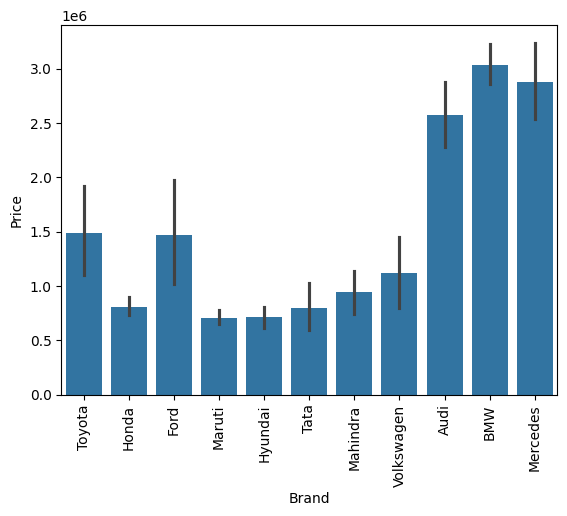

In [32]:
sns.barplot(data=cars_df, x='Brand', y='Price')
plt.xticks(rotation=90)

In [37]:
# Створюємо та навчаємо OHE тільки на X_train
encoder = OneHotEncoder()
encoder.fit(X_train[['Brand']])

encoder.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [39]:
one_hot = encoder.transform(X_train[['Brand']]).toarray()

In [40]:
X_train[encoder.categories_[0]] = one_hot

In [42]:
one_hot_test = encoder.transform(X_test[['Brand']]).toarray()
X_test[encoder.categories_[0]] = one_hot_test

In [43]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
83,84,Volkswagen,T-Roc,2019,22000,1,1,Second,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,56,Audi,A5,2018,28000,0,1,First,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,1,1,First,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,1,0,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,20,Mercedes,GLC,2017,26000,1,1,Second,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
17,18,Audi,Q3,2016,38000,1,1,Second,15,1395,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,42,Hyundai,Santro,2019,26000,1,0,Third,20,1086,68,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,93,Volkswagen,Vento,2017,32000,1,0,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,15,Maruti,Ertiga,2020,18000,1,0,First,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,1,0,Third,20,1194,94,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(None, None)

In [44]:
X_train = X_train.drop(columns=['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota', 'Volkswagen'])
X_test = X_test.drop(columns=['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota', 'Volkswagen'])

In [45]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
83,84,Volkswagen,T-Roc,2019,22000,1,1,Second,18,1498,148,5
55,56,Audi,A5,2018,28000,0,1,First,17,1968,187,5
26,27,Audi,A6,2018,28000,1,1,First,15,1984,241,5
54,55,Volkswagen,Vento,2017,32000,1,0,Second,18,1598,103,5
19,20,Mercedes,GLC,2017,26000,1,1,Second,12,1991,241,5


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
17,18,Audi,Q3,2016,38000,1,1,Second,15,1395,148,5
41,42,Hyundai,Santro,2019,26000,1,0,Third,20,1086,68,5
92,93,Volkswagen,Vento,2017,32000,1,0,Second,18,1598,103,5
14,15,Maruti,Ertiga,2020,18000,1,0,First,19,1462,103,7
68,69,Ford,Aspire,2019,26000,1,0,Third,20,1194,94,5


(None, None)

In [88]:
premium = ['Audi', 'BMW', 'Mercedes']
middle = ['Ford', 'Honda', 'Hyundai', 'Volkswagen', 'Toyota']
budget = ['Mahindra', 'Maruti', 'Tata']

def brand_class(brand):
    if brand in premium:
        return 2
    elif brand in middle:
        return 1
    else:
        return 0

X_train['Brand_Grouped'] = X_train['Brand'].apply(brand_class)
X_test['Brand_Grouped'] = X_test['Brand'].apply(brand_class)

In [89]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Grouped,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,1,1,Second,18,1498,148,5,1,1.0
55,56,Audi,A5,2018,28000,0,1,First,17,1968,187,5,2,0.0
26,27,Audi,A6,2018,28000,1,1,First,15,1984,241,5,2,0.0
54,55,Volkswagen,Vento,2017,32000,1,0,Second,18,1598,103,5,1,1.0
19,20,Mercedes,GLC,2017,26000,1,1,Second,12,1991,241,5,2,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Grouped,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,1,1,Second,15,1395,148,5,2,1.0
41,42,Hyundai,Santro,2019,26000,1,0,Third,20,1086,68,5,1,2.0
92,93,Volkswagen,Vento,2017,32000,1,0,Second,18,1598,103,5,1,1.0
14,15,Maruti,Ertiga,2020,18000,1,0,First,19,1462,103,7,0,0.0
68,69,Ford,Aspire,2019,26000,1,0,Third,20,1194,94,5,1,2.0


(None, None)

Очікуваний результат після трансформацій:

In [90]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Grouped,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,1,1,Second,18,1498,148,5,1,1.0
55,56,Audi,A5,2018,28000,0,1,First,17,1968,187,5,2,0.0
26,27,Audi,A6,2018,28000,1,1,First,15,1984,241,5,2,0.0
54,55,Volkswagen,Vento,2017,32000,1,0,Second,18,1598,103,5,1,1.0
19,20,Mercedes,GLC,2017,26000,1,1,Second,12,1991,241,5,2,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Grouped,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,1,1,Second,15,1395,148,5,2,1.0
41,42,Hyundai,Santro,2019,26000,1,0,Third,20,1086,68,5,1,2.0
92,93,Volkswagen,Vento,2017,32000,1,0,Second,18,1598,103,5,1,1.0
14,15,Maruti,Ertiga,2020,18000,1,0,First,19,1462,103,7,0,0.0
68,69,Ford,Aspire,2019,26000,1,0,Third,20,1194,94,5,1,2.0


(None, None)

Колонку Owner_Type з використанням sklearn.preprocessing.OrdinalEncoder я закодую для вас. Проаналізуйте, що відбувається.

**Оскільки в колонці Owner_Type ми маємо значення First, Second, Third -> ви їх закодували в колонці Owner_Type_Codes на 0, 1, 2 відповідно.**
Реалізую це:

In [91]:
encoder = OrdinalEncoder()
X_train['Owner_Type_Codes'] = encoder.fit_transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = encoder.transform(X_test[['Owner_Type']])

print(X_train[['Owner_Type', 'Owner_Type_Codes']].head())
print(X_test[['Owner_Type', 'Owner_Type_Codes']].head())

   Owner_Type  Owner_Type_Codes
83     Second               1.0
55      First               0.0
26      First               0.0
54     Second               1.0
19     Second               1.0
   Owner_Type  Owner_Type_Codes
17     Second               1.0
41      Third               2.0
92     Second               1.0
14      First               0.0
68      Third               2.0


In [92]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Grouped,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,1,1,Second,18,1498,148,5,1,1.0
55,56,Audi,A5,2018,28000,0,1,First,17,1968,187,5,2,0.0
26,27,Audi,A6,2018,28000,1,1,First,15,1984,241,5,2,0.0
54,55,Volkswagen,Vento,2017,32000,1,0,Second,18,1598,103,5,1,1.0
19,20,Mercedes,GLC,2017,26000,1,1,Second,12,1991,241,5,2,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Grouped,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,1,1,Second,15,1395,148,5,2,1.0
41,42,Hyundai,Santro,2019,26000,1,0,Third,20,1086,68,5,1,2.0
92,93,Volkswagen,Vento,2017,32000,1,0,Second,18,1598,103,5,1,1.0
14,15,Maruti,Ertiga,2020,18000,1,0,First,19,1462,103,7,0,0.0
68,69,Ford,Aspire,2019,26000,1,0,Third,20,1194,94,5,1,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [93]:
numerical_X_train = X_train.select_dtypes(exclude='object')
numerical_train_df = pd.concat([numerical_X_train, y_train], axis=1)

In [94]:
corr_matrix_train = numerical_train_df.corr()

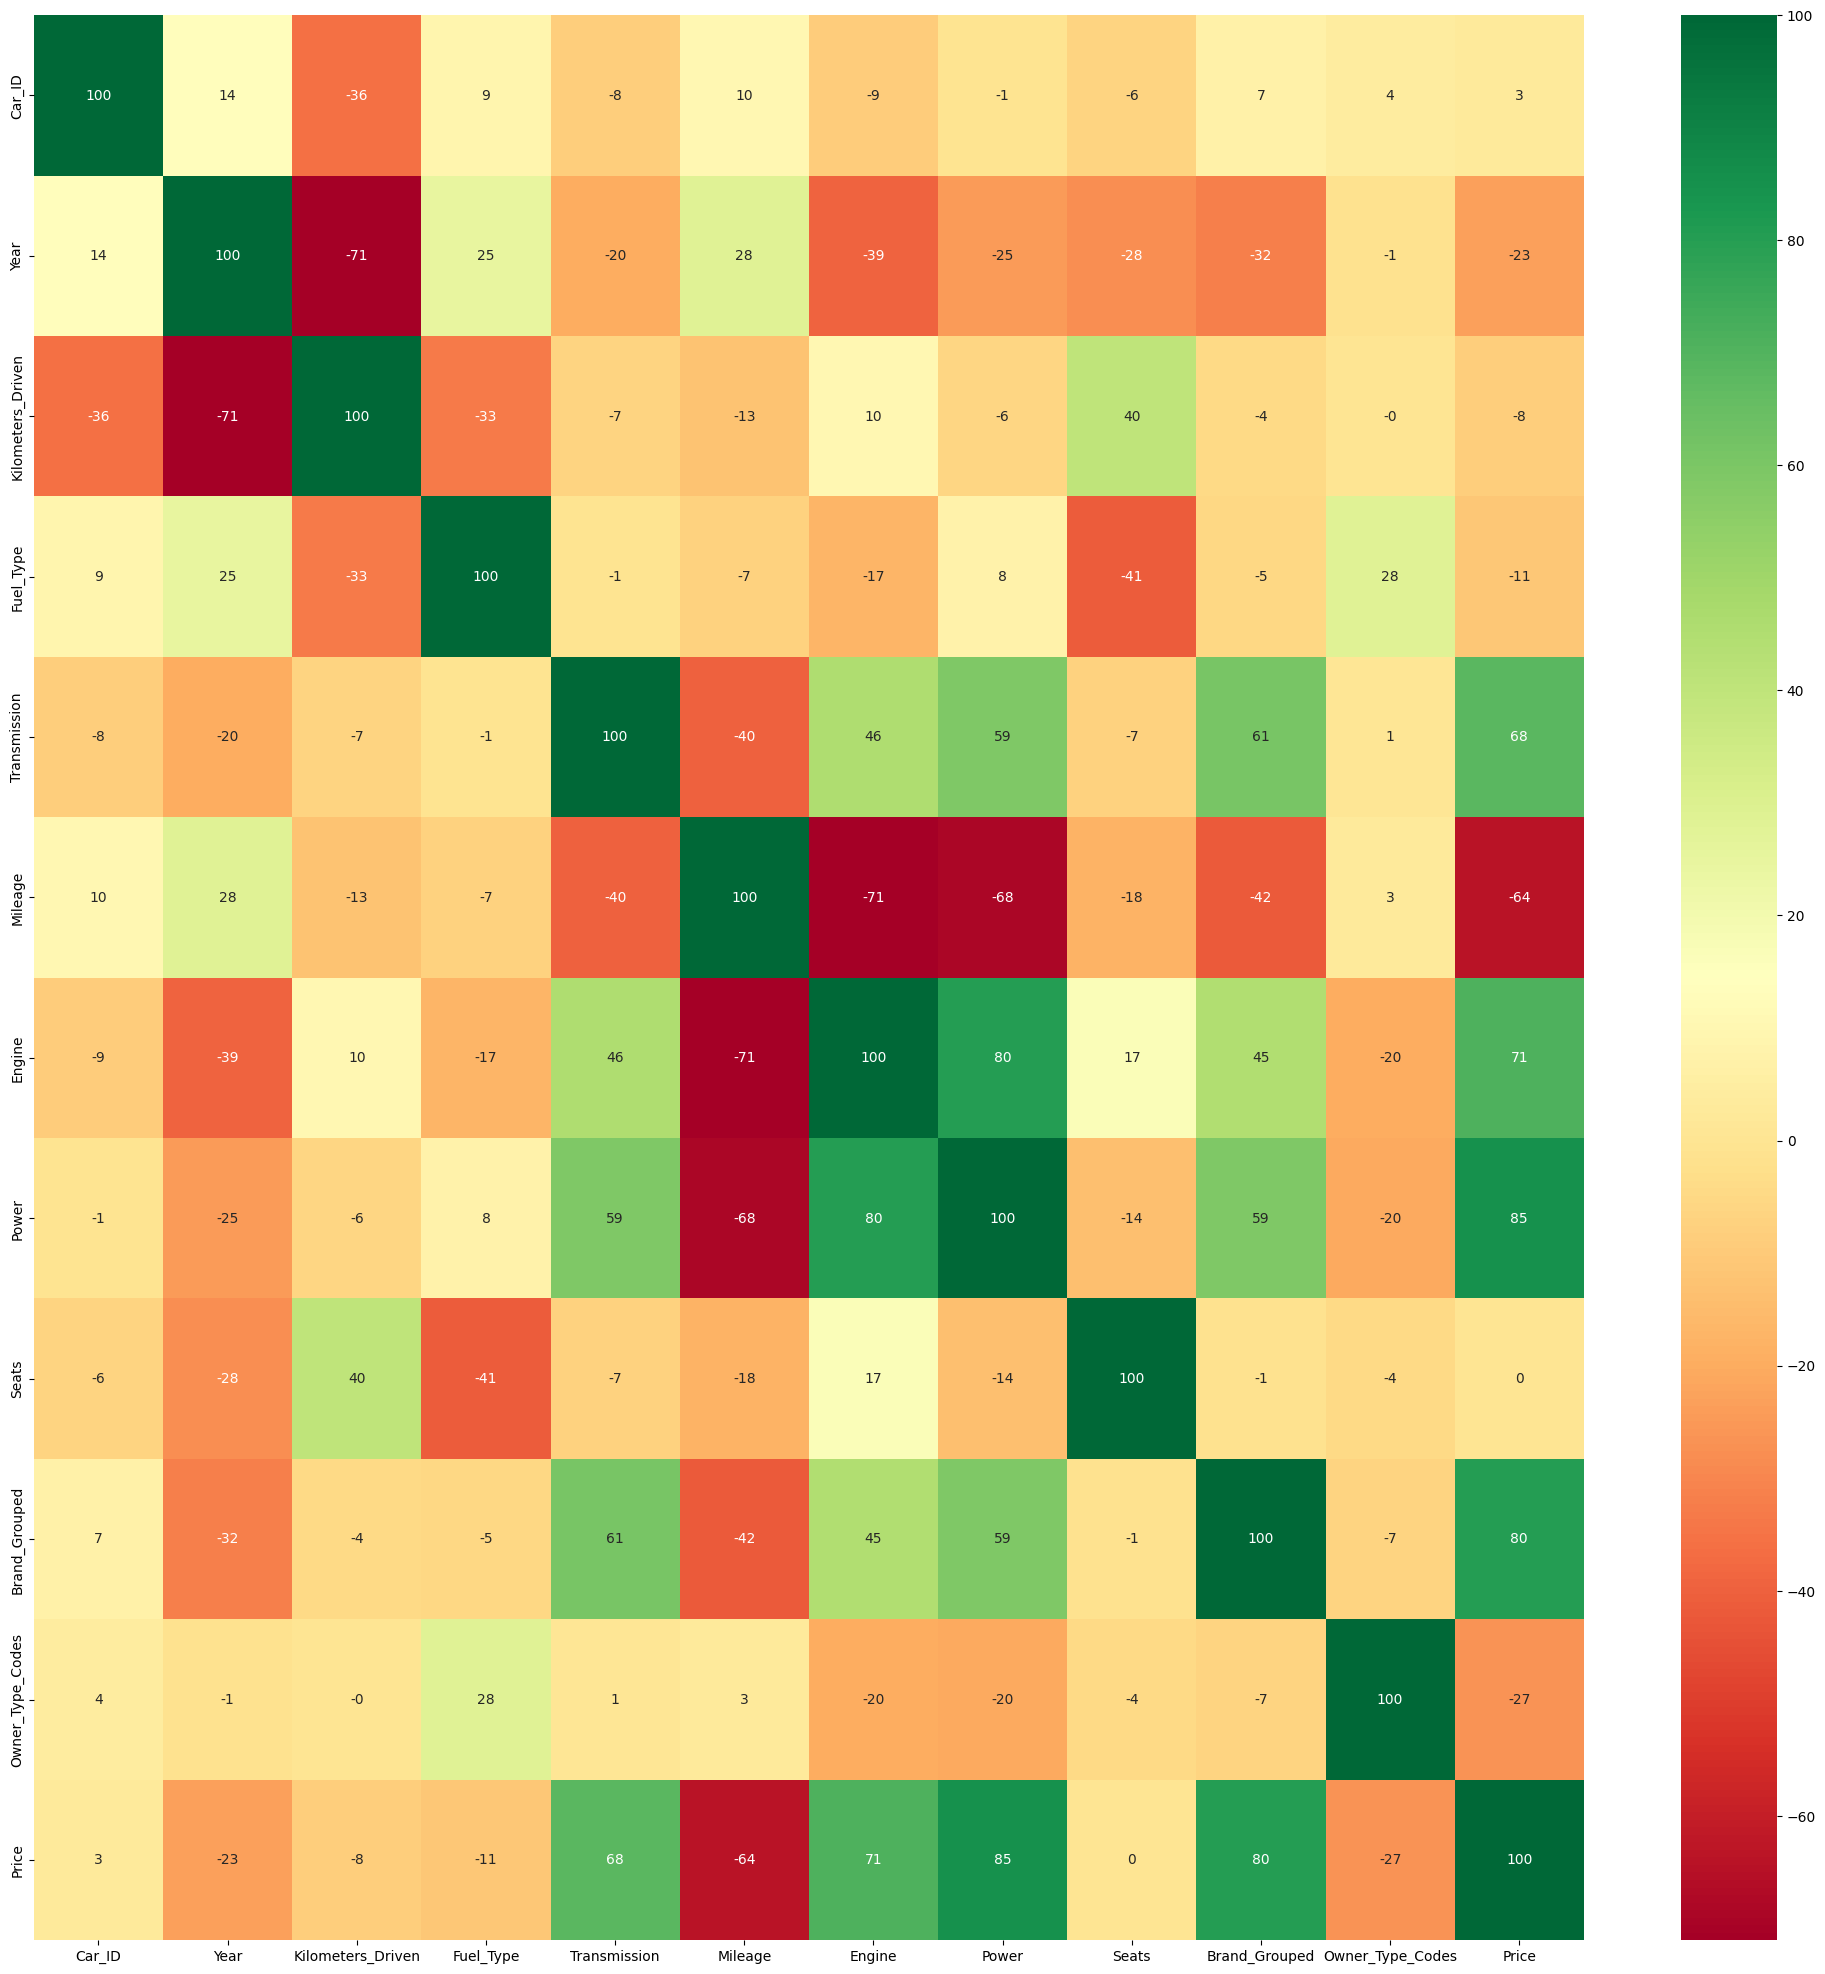

In [95]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_matrix_train*100, annot = True, cmap = "RdYlGn", cbar = True, fmt='.0f')
plt.show()

In [96]:
corr_matrix_train['Price'].abs().sort_values(ascending=False)

,Price
Price,1.000000
Power,0.849137
Brand_Grouped,0.803288
Engine,0.710561
Transmission,0.680731
Mileage,0.638404
Owner_Type_Codes,0.265537
Year,0.233769
Fuel_Type,0.110782
Kilometers_Driven,0.083951


**Топ кореляцій з Price:**


*   Power         ---> 0.849137
*   Brand_Grouped ---> 0.803288
*   Engine        ---> 0.710561
*   Transmission  ---> 0.680731
*   Mileage       ---> 0.638404 (negative)

**ВИСНОВОК:** потужність, об'єм двигуна, трансмісія та бренд (чим преміальніший) збільшують ціну автомобіля, а пробіг (чим більший) зменшує.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [97]:
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])

In [98]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 83 to 75
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_ID             80 non-null     int64  
 1   Year               80 non-null     int64  
 2   Kilometers_Driven  80 non-null     int64  
 3   Fuel_Type          80 non-null     int64  
 4   Transmission       80 non-null     int64  
 5   Mileage            80 non-null     int64  
 6   Engine             80 non-null     int64  
 7   Power              80 non-null     int64  
 8   Seats              80 non-null     int64  
 9   Brand_Grouped      80 non-null     int64  
 10  Owner_Type_Codes   80 non-null     float64
dtypes: float64(1), int64(10)
memory usage: 7.5 KB


In [99]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 17 to 16
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_ID             20 non-null     int64  
 1   Year               20 non-null     int64  
 2   Kilometers_Driven  20 non-null     int64  
 3   Fuel_Type          20 non-null     int64  
 4   Transmission       20 non-null     int64  
 5   Mileage            20 non-null     int64  
 6   Engine             20 non-null     int64  
 7   Power              20 non-null     int64  
 8   Seats              20 non-null     int64  
 9   Brand_Grouped      20 non-null     int64  
 10  Owner_Type_Codes   20 non-null     float64
dtypes: float64(1), int64(10)
memory usage: 1.9 KB


In [101]:
model = LinearRegression()
model.fit(X_train, y_train)
y_train_prediction = model.predict(X_train)
loss = mean_squared_error(y_train, y_train_prediction)
rmse = loss**0.5
r2 = r2_score(y_train, y_train_prediction)
print(f"Mean Squared Error: {loss}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2: {r2}")

Mean Squared Error: 91590677788.29208
Root Mean Squared Error: 302639.5178893399
R2: 0.9143141484562187


Модель пояснює ~ 90% варіативності залежної зміннної пояснюється змінними у моделі. Гарна апроксимація моделі. Але MSE та RMSE виглядають якимись дуже великими.



In [104]:
y_test_prediction = model.predict(X_test)
loss = mean_squared_error(y_test, y_test_prediction)
rmse = loss**0.5
r2 = r2_score(y_test, y_test_prediction)
print(f"Mean Squared Error: {loss}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2: {r2}")

Mean Squared Error: 77974422633.66092
Root Mean Squared Error: 279239.00628970325
R2: 0.8275855773716729


Модель пояснює ~ 80% варіативності залежної зміннної пояснюється змінними у моделі. Це також гарна апроксимація моделі. MSE та RMSE виглядають великими але нижчими ніж на тренувальних даних, що виглядає як хороший знак.

**ГРАФІКИ ДЛЯ ТРЕНУВАЛЬНОГО НАБОРУ ДАНИХ**

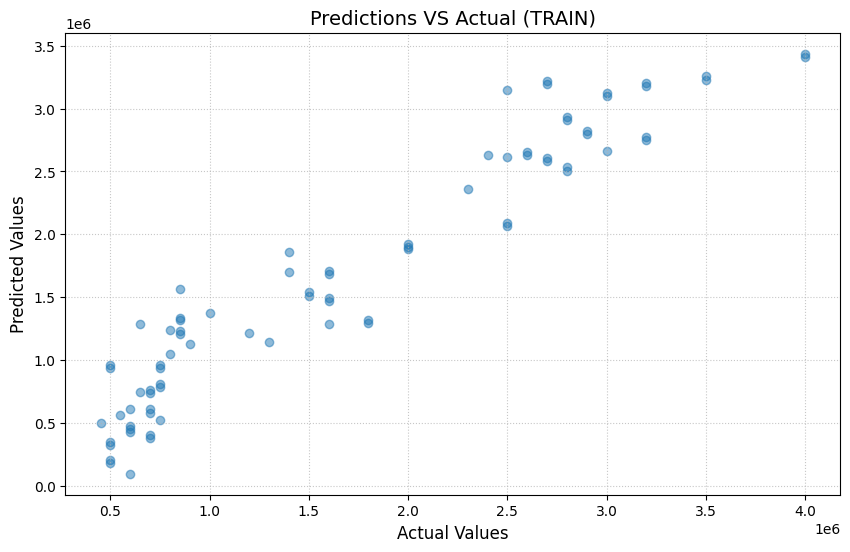

In [118]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_prediction, alpha=0.5)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Predictions VS Actual (TRAIN)", fontsize=14)

plt.grid(True, linestyle='dotted', alpha=0.7)
plt.show()

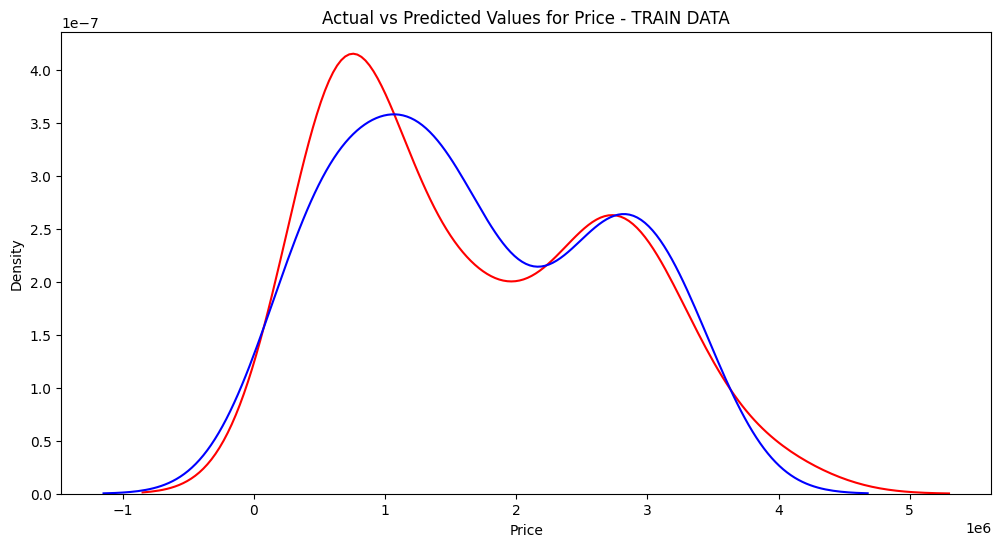

In [130]:
plt.figure(figsize=(12, 6))

ax1 = sns.kdeplot(y_train.squeeze(), color="r", label="Actual Value")
sns.kdeplot(y_train_prediction.squeeze(), color="b", label="Predicted Values", ax=ax1)

plt.title('Actual vs Predicted Values for Price - TRAIN DATA')
plt.xlabel('Price')
plt.ylabel('Density')

plt.show()
plt.close()

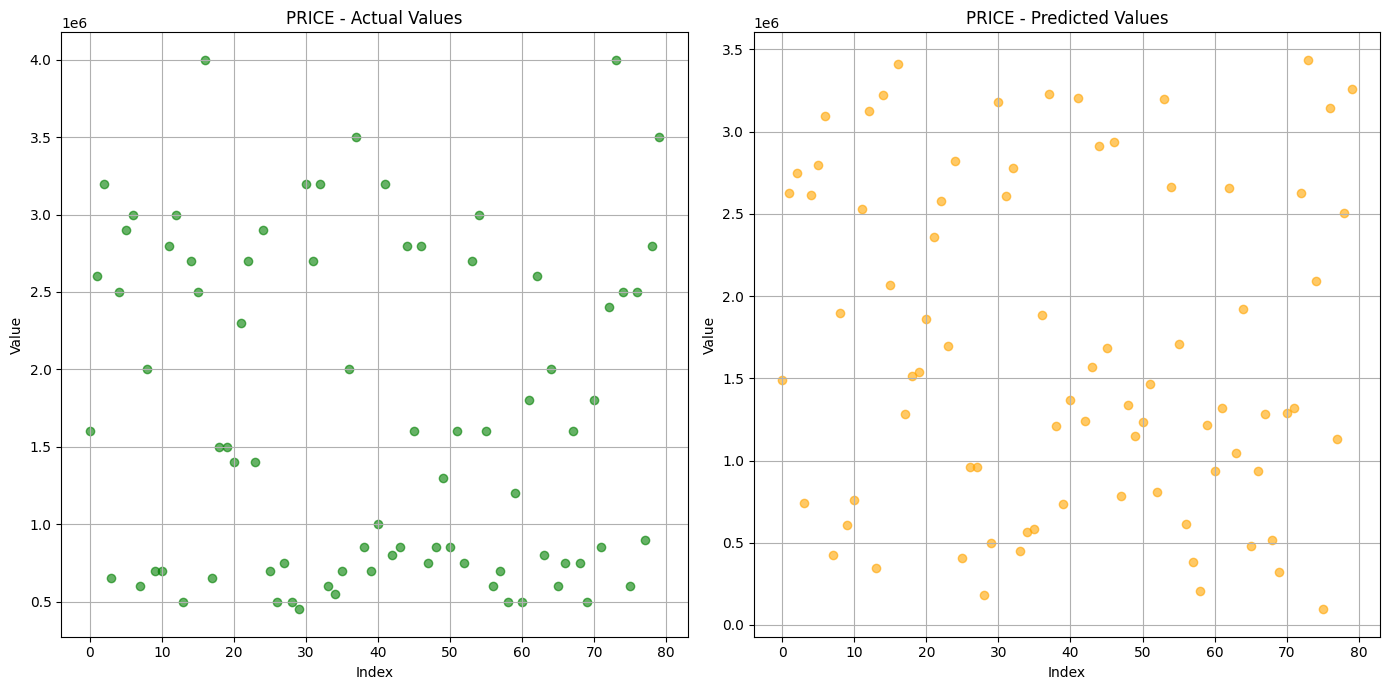

In [127]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(range(len(y_train)), y_train, color='green', alpha=0.6)
plt.title('PRICE - Actual Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(range(len(y_train_prediction)), y_train_prediction, color='orange', alpha=0.6)
plt.title('PRICE - Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)

plt.tight_layout()
plt.show()

**ГРАФІКИ ДЛЯ ТЕСТУВАЛЬНОГО НАБОРУ ДАНИХ**

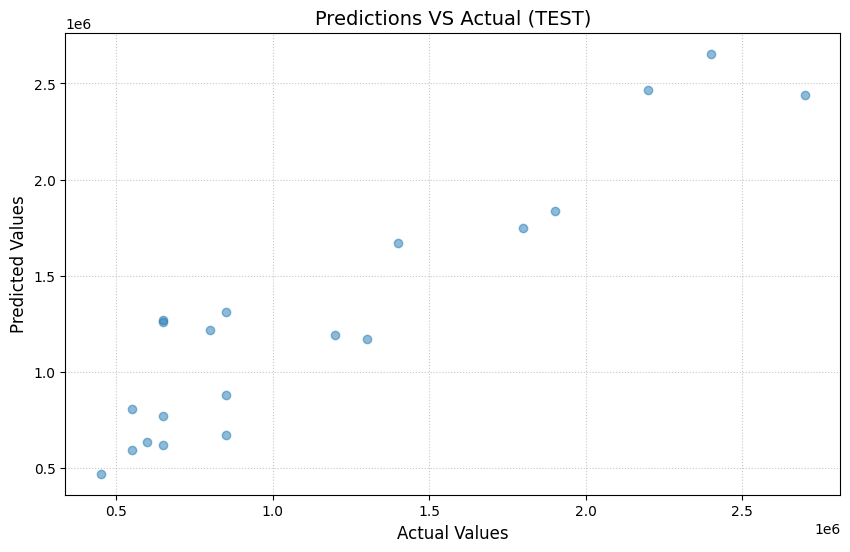

In [128]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_prediction, alpha=0.5)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Predictions VS Actual (TEST)", fontsize=14)

plt.grid(True, linestyle='dotted', alpha=0.7)
plt.show()

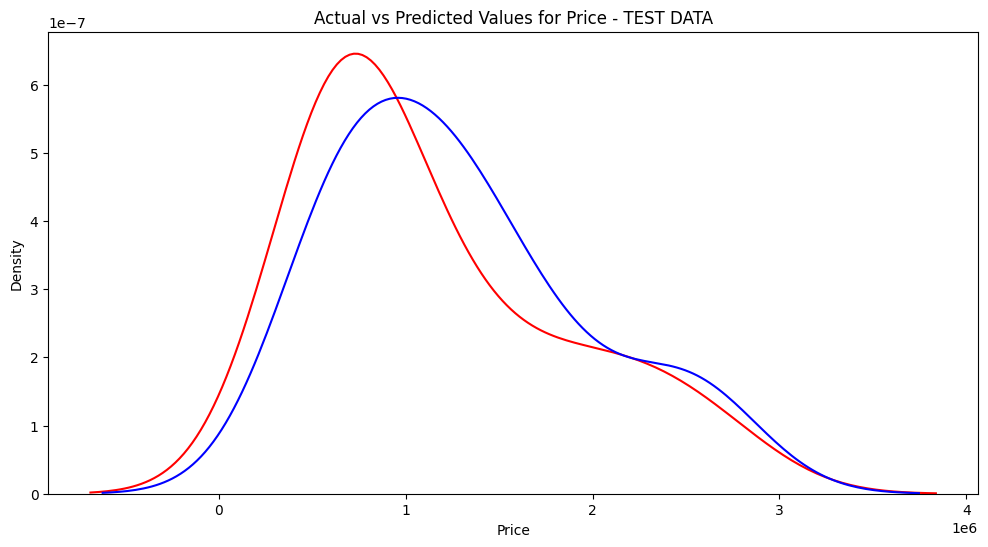

In [129]:
plt.figure(figsize=(12, 6))

ax1 = sns.kdeplot(y_test.squeeze(), color="r", label="Actual Value")
sns.kdeplot(y_test_prediction.squeeze(), color="b", label="Predicted Values", ax=ax1)

plt.title('Actual vs Predicted Values for Price - TEST DATA')
plt.xlabel('Price')
plt.ylabel('Density')

plt.show()
plt.close()

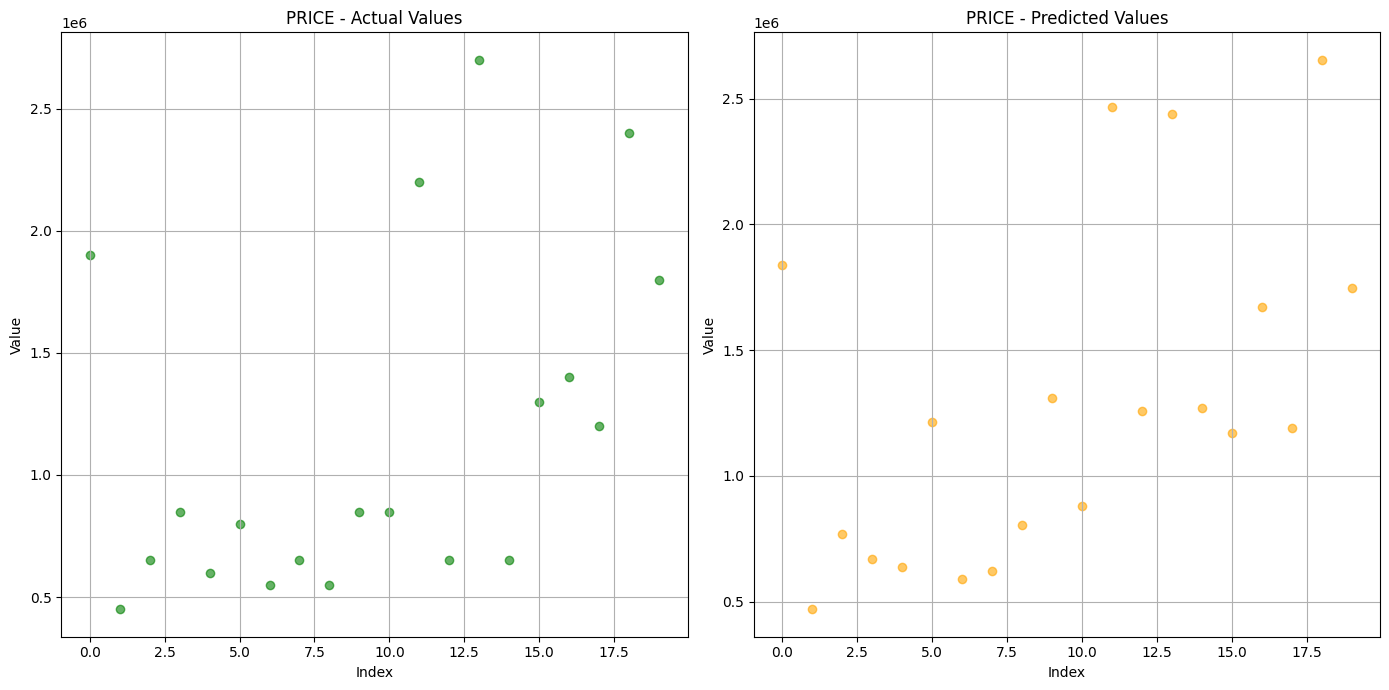

In [132]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, color='green', alpha=0.6)
plt.title('PRICE - Actual Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test_prediction)), y_test_prediction, color='orange', alpha=0.6)
plt.title('PRICE - Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)

plt.tight_layout()
plt.show()

Як на мене модель досить непогано передбачила Price. Адже графіки показують що передбачені дані покривають значну частину реальних.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [172]:
# Масштабування
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Навчаємо scaler і трансформуємо
X_test_scaled = scaler.transform(X_test)  # Лише трансформуємо

# Навчаємо модель
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Коефіцієнти моделі
coefficients = model.coef_

# Reshape coefficients to be 1-dimensional
coefficients = coefficients.flatten()  # Convert to 1D array

# Аналізуємо найвпливовіші змінні
feature_names = X_train.columns
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

# Виводимо результати
print(coeff_df[['Feature', 'Coefficient']])

              Feature    Coefficient
7               Power  461168.049670
9       Brand_Grouped  433085.983175
5             Mileage -134383.834889
4        Transmission  133156.506359
3           Fuel_Type -121870.244895
10   Owner_Type_Codes -111085.170309
1                Year   95032.241240
8               Seats   40014.352797
2   Kilometers_Driven  -30834.712082
0              Car_ID   19438.280068
6              Engine    7688.781686


Найвпливовіші колонки: Power, Brand, Mileage.
Mileage зменшує таргет - інші збільшують - це логічно.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [173]:
X_train.columns

Index(['Car_ID', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Mileage', 'Engine', 'Power', 'Seats', 'Brand_Grouped',
       'Owner_Type_Codes'],
      dtype='object')

In [174]:
# Додаємо константу для перехоплення
X_train_scaled_st = sm.add_constant(X_train_scaled)

# Створюємо модель OLS
model = sm.OLS(y_train, X_train_scaled_st)
results = model.fit()

In [175]:
print(results.summary())
p_values = results.pvalues[1:]  # Пропускаємо константу
significant_features_indexes = [i for i, p in enumerate(p_values) if p < 0.05]

print("\nСтатистично значущі змінні (p < 0.05):")
for feature_index in significant_features_indexes:
    print(X_train.columns[feature_index])

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     65.96
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           7.46e-32
Time:                        23:26:31   Log-Likelihood:                -1123.1
No. Observations:                  80   AIC:                             2270.
Df Residuals:                      68   BIC:                             2299.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   3.67e+04     45.776      0.0

*    Залежна змінна: Price
*    Модель: OLS (Метод найменших квадратів)
*    Кількість спостережень: 80
*    Кількість параметрів моделі: 11
*    R-квадрат: 0.914 (модель пояснює 91.4% варіації у залежній змінній)
*    Adj. R-квадрат: 0.900 (скоригований R-квадрат)
*    F-статистика: 65.96 (модель значуща, оскільки p-значення дуже маленьке, хоча є і незначущі фактори)
*    Log-правдоподібність: -1123.1
*    AIC: 2270
*    BIC: 2299

**ВИСНОВОК:**
* Модель загалом якісна, але деякі змінні незначущі.
* Змінні Fuel_Type, Transmission, Mileage, Power, Brand_Grouped,Owner_Type_Codes найбільше впливають на ціну.

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [176]:
selected_features = [
    'Fuel_Type',
    'Transmission',
    'Mileage',
    'Power',
    'Brand_Grouped',
    'Owner_Type_Codes'
]

In [179]:
new_X_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
new_X_df = new_X_df[selected_features]

In [180]:
new_X_df.head()

,Fuel_Type,Transmission,Mileage,Power,Brand_Grouped,Owner_Type_Codes
0,0.975305,0.795395,0.274862,-0.231967,-0.117469,0.535303
1,-1.025320,0.795395,-0.018324,0.247012,1.225032,-0.994135
2,0.975305,0.795395,-0.604696,0.910213,1.225032,-0.994135
3,0.975305,-1.257237,0.274862,-0.784634,-0.117469,0.535303
4,0.975305,0.795395,-1.484254,0.910213,1.225032,0.535303


In [182]:
# Додаємо константу для перехоплення
new_X_df_with_const = sm.add_constant(new_X_df)

#  Align the indices
new_X_df_with_const = new_X_df_with_const.set_index(y_train.index)

# Створюємо модель OLS
model = sm.OLS(y_train, new_X_df_with_const)
results = model.fit()

In [185]:
print(results.summary())
p_values = results.pvalues[1:]  # Пропускаємо константу
significant_features_indexes = [i for i, p in enumerate(p_values) if p < 0.05]

print("\nСтатистично значущі змінні (p < 0.05):")
for feature_index in significant_features_indexes:
    print(new_X_df.columns[feature_index])

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     113.2
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           6.23e-35
Time:                        23:34:15   Log-Likelihood:                -1128.1
No. Observations:                  80   AIC:                             2270.
Df Residuals:                      73   BIC:                             2287.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              1.68e+06   3.77e+04  

Показники ДО:
* R-квадрат: 0.914 (модель пояснює 91.4% варіації у залежній змінній)
* Adj. R-квадрат: 0.900 (скоригований R-квадрат)

Показники ПІСЛЯ:
* R-квадрат: 0.903 (модель пояснює 90.3% варіації у залежній змінній)
* Adj. R-квадрат: 0.895 (скоригований R-квадрат)

Показники погіршилися.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [201]:
X_train.columns

Index(['Car_ID', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Mileage', 'Engine', 'Power', 'Seats', 'Brand_Grouped',
       'Owner_Type_Codes'],
      dtype='object')

In [203]:
selected_columns = [
    'Year',
    'Fuel_Type',
    'Transmission',
    'Mileage',
    'Power',
    'Brand_Grouped',
    'Owner_Type_Codes'
]

In [204]:
last_X_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
last_X_df = last_X_df[selected_columns]

In [205]:
# Додаємо константу для перехоплення
last_X_df_with_const = sm.add_constant(last_X_df)

#  Align the indices
last_X_df_with_const = last_X_df_with_const.set_index(y_train.index)

# Створюємо модель OLS
model = sm.OLS(y_train, last_X_df_with_const)
results = model.fit()

In [207]:
print(results.summary())
p_values = results.pvalues[1:]  # Пропускаємо константу
significant_features_indexes = [i for i, p in enumerate(p_values) if p < 0.05]

print("\nСтатистично значущі змінні (p < 0.05):")
for feature_index in significant_features_indexes:
    print(last_X_df.columns[feature_index])

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     107.2
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           1.74e-35
Time:                        23:54:32   Log-Likelihood:                -1124.0
No. Observations:                  80   AIC:                             2264.
Df Residuals:                      72   BIC:                             2283.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              1.68e+06    3.6e+04  

**Показники 1:**
* R-квадрат: 0.914 (модель пояснює 91.4% варіації у залежній змінній)
* Adj. R-квадрат: 0.900 (скоригований R-квадрат)

**Показники 2:**
* R-квадрат: 0.903 (модель пояснює 90.3% варіації у залежній змінній)
* Adj. R-квадрат: 0.895 (скоригований R-квадрат)

**Показники 3:**
* R-квадрат: 0.912 (модель пояснює 91.2% варіації у залежній змінній)
* Adj. R-квадрат: 0.904 (скоригований R-квадрат)

**Висновок**
Ми бачимо, що показник R-квадрат трішки менший, але скоригований навпаки, більший. Це означає, що ми мінімізували вплив не дуже впливаючих змінних і модель видає кращий результат. Тому, я би орієнтувалася на скоригований R квадрат і обрала би останню, третю модель з 10 завдання.